# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [1]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

/home/lgcorzo/miniconda3/envs/finrobot/lib/python3.10/site-packages/flaml/__init__.py:20: UserWarning: flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.
  warnings.warn("flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.")


After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [2]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["azure-gpt"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [3]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Microsoft's 2024 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

To create an annual report based on Microsoft's 2024 10-K report, I will follow a systematic approach to gather and analyze the necessary financial data and insights. Here's the working plan:

### Working Plan:

1. **Retrieve the 10-K Report**: First, I will obtain the 10-K report for Microsoft for the fiscal year 2024 to gat

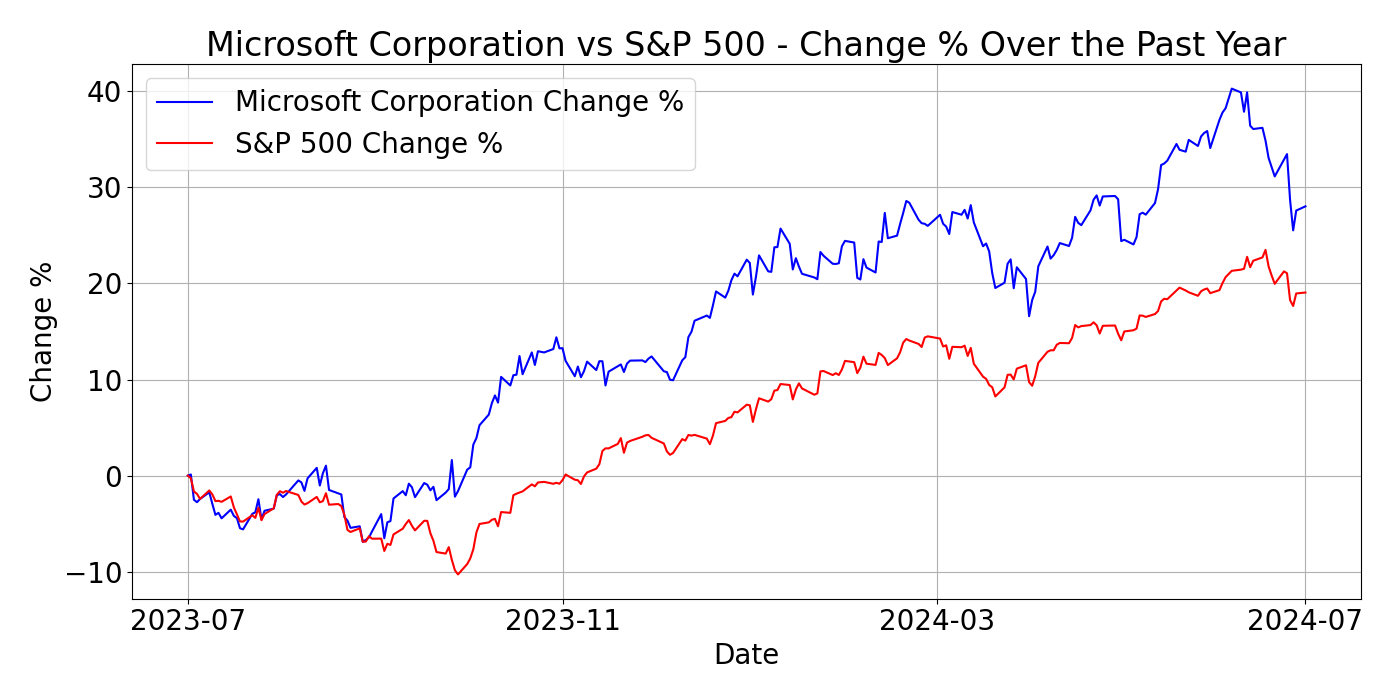

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_wonSahPrxRSznu6vTjtqbDqf) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

***** Suggested tool call (call_wHFuBy3GOKBU6EZiTr9PSj3b): display_image *****
Arguments: 
{"image_path":"../report/pe_eps_performance.png"}
******************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION display_image...


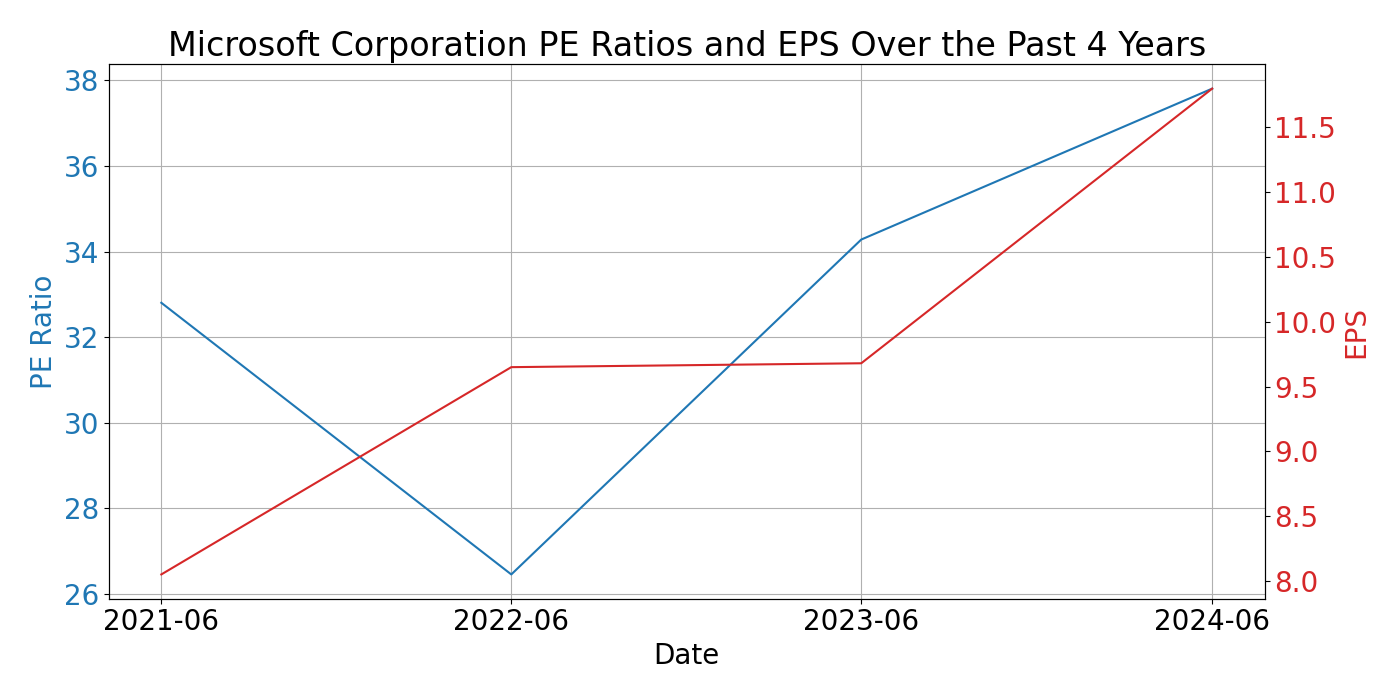

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_wHFuBy3GOKBU6EZiTr9PSj3b) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

I have successfully generated the visuals for both **Share Performance** and **PE & EPS Performance**. Here are the images:

1. **Share Performance**: 
   ![Share Performance](../report/share_performance.png)

2. **PE & EPS Performance**:
   ![PE & EPS Performance](../report/pe_eps_performance.png)

### Step 3: Compile the Report

Now that I have gathered all the necessary analyses and visuals, I will compile the findings into a structured report. 

I will create paragraphs for each section, ensuring that the word count for each paragraph is between 400 and 450 words. 

Let me proceed with this compilation.
***** Suggested tool call (call_pUuxj85L04HCCOl0MwDC1LjR): build_annual_report *****
Arg

In [4]:
company = "Microsoft"
fyear = "2024"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [5]:
!pip install PyMuPDF

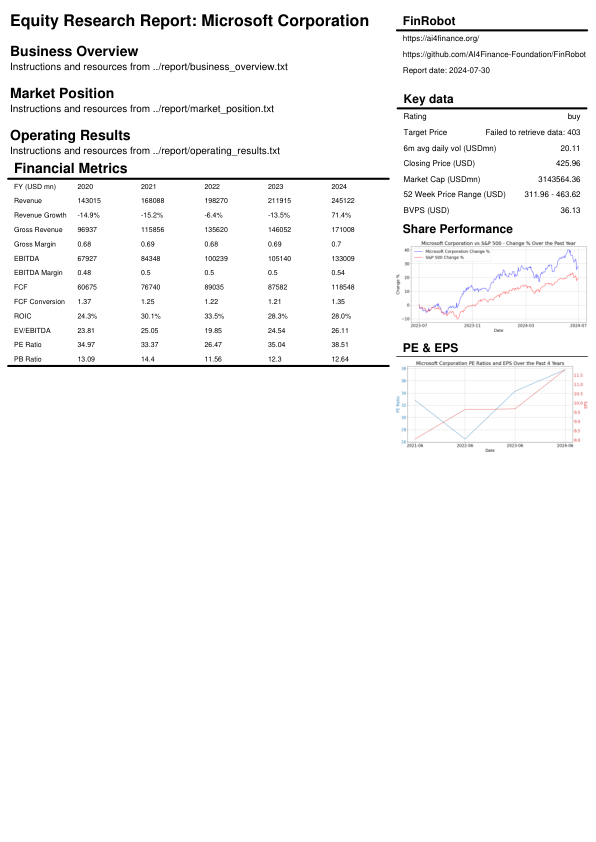

In [11]:
import io
import fitz
from PIL import Image


pdf = fitz.open("/mnt/F024B17C24B145FE/Repos/FinRobot/report/Microsoft_2024_Annual_Report.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)